In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../datasets/crimes/NYPD_Hate_Crimes.csv',header=0)

In [2]:
dfnew = df[['Full Complaint ID','Complaint Year Number','Month Number','Bias Motive Description','Offense Category','Other Motive Description','Arrest Id']]

In [3]:
# sorting by Full Complaint ID
dfnew.sort_values("Full Complaint ID", inplace = True)
  
# dropping ALL duplicte values
dfnew.drop_duplicates(subset ="Full Complaint ID", keep = False, inplace = True)

# sorting by Arrest Id
dfnew.sort_values("Arrest Id", inplace = True)
  
# dropping ALL duplicte values but not NaN
dfnew=dfnew[dfnew['Arrest Id'].isnull() | ~dfnew[dfnew['Arrest Id'].notnull()].duplicated(subset='Arrest Id',keep='first')]

dfnew.style

<ipython-input-3-69796a751905>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnew.sort_values("Full Complaint ID", inplace = True)
<ipython-input-3-69796a751905>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnew.drop_duplicates(subset ="Full Complaint ID", keep = False, inplace = True)
<ipython-input-3-69796a751905>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnew.sort_values("Arrest Id", inplace = True)
<ipython-input-3

,Full Complaint ID,Complaint Year Number,Month Number,Bias Motive Description,Offense Category,Other Motive Description,Arrest Id
145,201904612204817,2019,2,ANTI-MALE HOMOSEXUAL (GAY),Sexual Orientation,nan,B19606200
151,201904812229517,2019,3,ANTI-WHITE,Race/Color,nan,B19610772
150,201904812226617,2019,3,ANTI-WHITE,Race/Color,nan,B19610788
138,201904212405517,2019,5,ANTI-MUSLIM,Religion/Religious Practice,nan,B19620158
133,201904012711317,2019,6,ANTI-WHITE,Race/Color,nan,B19625012
159,201904912495217,2019,7,ANTI-HISPANIC,Ethnicity/National Origin/Ancestry,nan,B19630132
149,201904712851617,2019,8,ANTI-TRANSGENDER,Gender,nan,B19632323
139,201904313084517,2019,10,ANTI-MUSLIM,Religion/Religious Practice,nan,B19642921
238,201907112825917,2019,12,ANTI-JEWISH,Religion/Religious Practice,nan,B19650852
512,202004412215017,2020,2,ANTI-MALE HOMOSEXUAL (GAY),Sexual Orientation,nan,B20604576


In [4]:
res = dfnew.groupby('Complaint Year Number').size()
print(res)

Complaint Year Number
2019    421
2020    264
2021     96
dtype: int64


<AxesSubplot:xlabel='Complaint Year Number'>

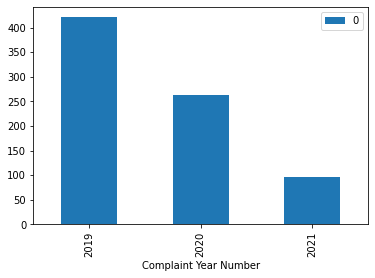

In [5]:
dfByYear = pd.DataFrame(res)
dfByYear.plot.bar()

In [6]:
dfnew.groupby(['Complaint Year Number', 'Bias Motive Description']).size().to_frame('size')

size
Complaint Year Number Bias Motive Description                
2019                  ANTI-ARAB                             5
                      ANTI-ASIAN                            1
                      ANTI-BLACK                           36
                      ANTI-BUDDHIST                         2
                      ANTI-CATHOLIC                         6
                      ANTI-FEMALE HOMOSEXUAL (LESBIAN)      4
                      ANTI-HISPANIC                         9
                      ANTI-JEHOVAHS WITNESS                 1
                      ANTI-JEWISH                         243
                      ANTI-LGBT (MIXED GROUP)               7
                      ANTI-MALE HOMOSEXUAL (GAY)           42
                      ANTI-MULTI-RACIAL GROUPS              1
                      ANTI-MUSLIM                          12
                      ANTI-OTHER ETHNICITY                  9
                      ANTI-OTHER RELIGION                   2
                      ANTI-PHYSICAL DISABILITY              1
                      ANTI-TRANSGENDER                     13
                      ANTI-WHITE                           27
2020                  60 YRS AND OLDER                      1
                      ANTI-ARAB                             1
                      ANTI-ASIAN                           28
                      ANTI-BLACK                           36
                      ANTI-CATHOLIC                         9
                      ANTI-FEMALE                           6
                      ANTI-FEMALE HOMOSEXUAL (LESBIAN)      4
                      ANTI-GENDER NON-CONFORMING            2
                      ANTI-HINDU                            2
                      ANTI-HISPANIC                         1
                      ANTI-JEWISH                         121
                      ANTI-LGBT (MIXED GROUP)               2
                      ANTI-MALE HOMOSEXUAL (GAY)           27
                      ANTI-MULTI-RACIAL GROUPS              2
                      ANTI-MUSLIM                           4
                      ANTI-OTHER ETHNICITY                  2
                      ANTI-RELIGIOUS PRACTICE GENERALLY     2
                      ANTI-TRANSGENDER                      4
                      ANTI-WHITE                           10
2021                  ANTI-ASIAN                           42
                      ANTI-BLACK                           12
                      ANTI-FEMALE                           3
                      ANTI-FEMALE HOMOSEXUAL (LESBIAN)      1
                      ANTI-HISPANIC                         1
                      ANTI-JEWISH                          27
                      ANTI-LGBT (MIXED GROUP)               1
                      ANTI-MALE HOMOSEXUAL (GAY)            4
                      ANTI-MUSLIM                           1
                      ANTI-OTHER ETHNICITY                  2
                      ANTI-TRANSGENDER                      2

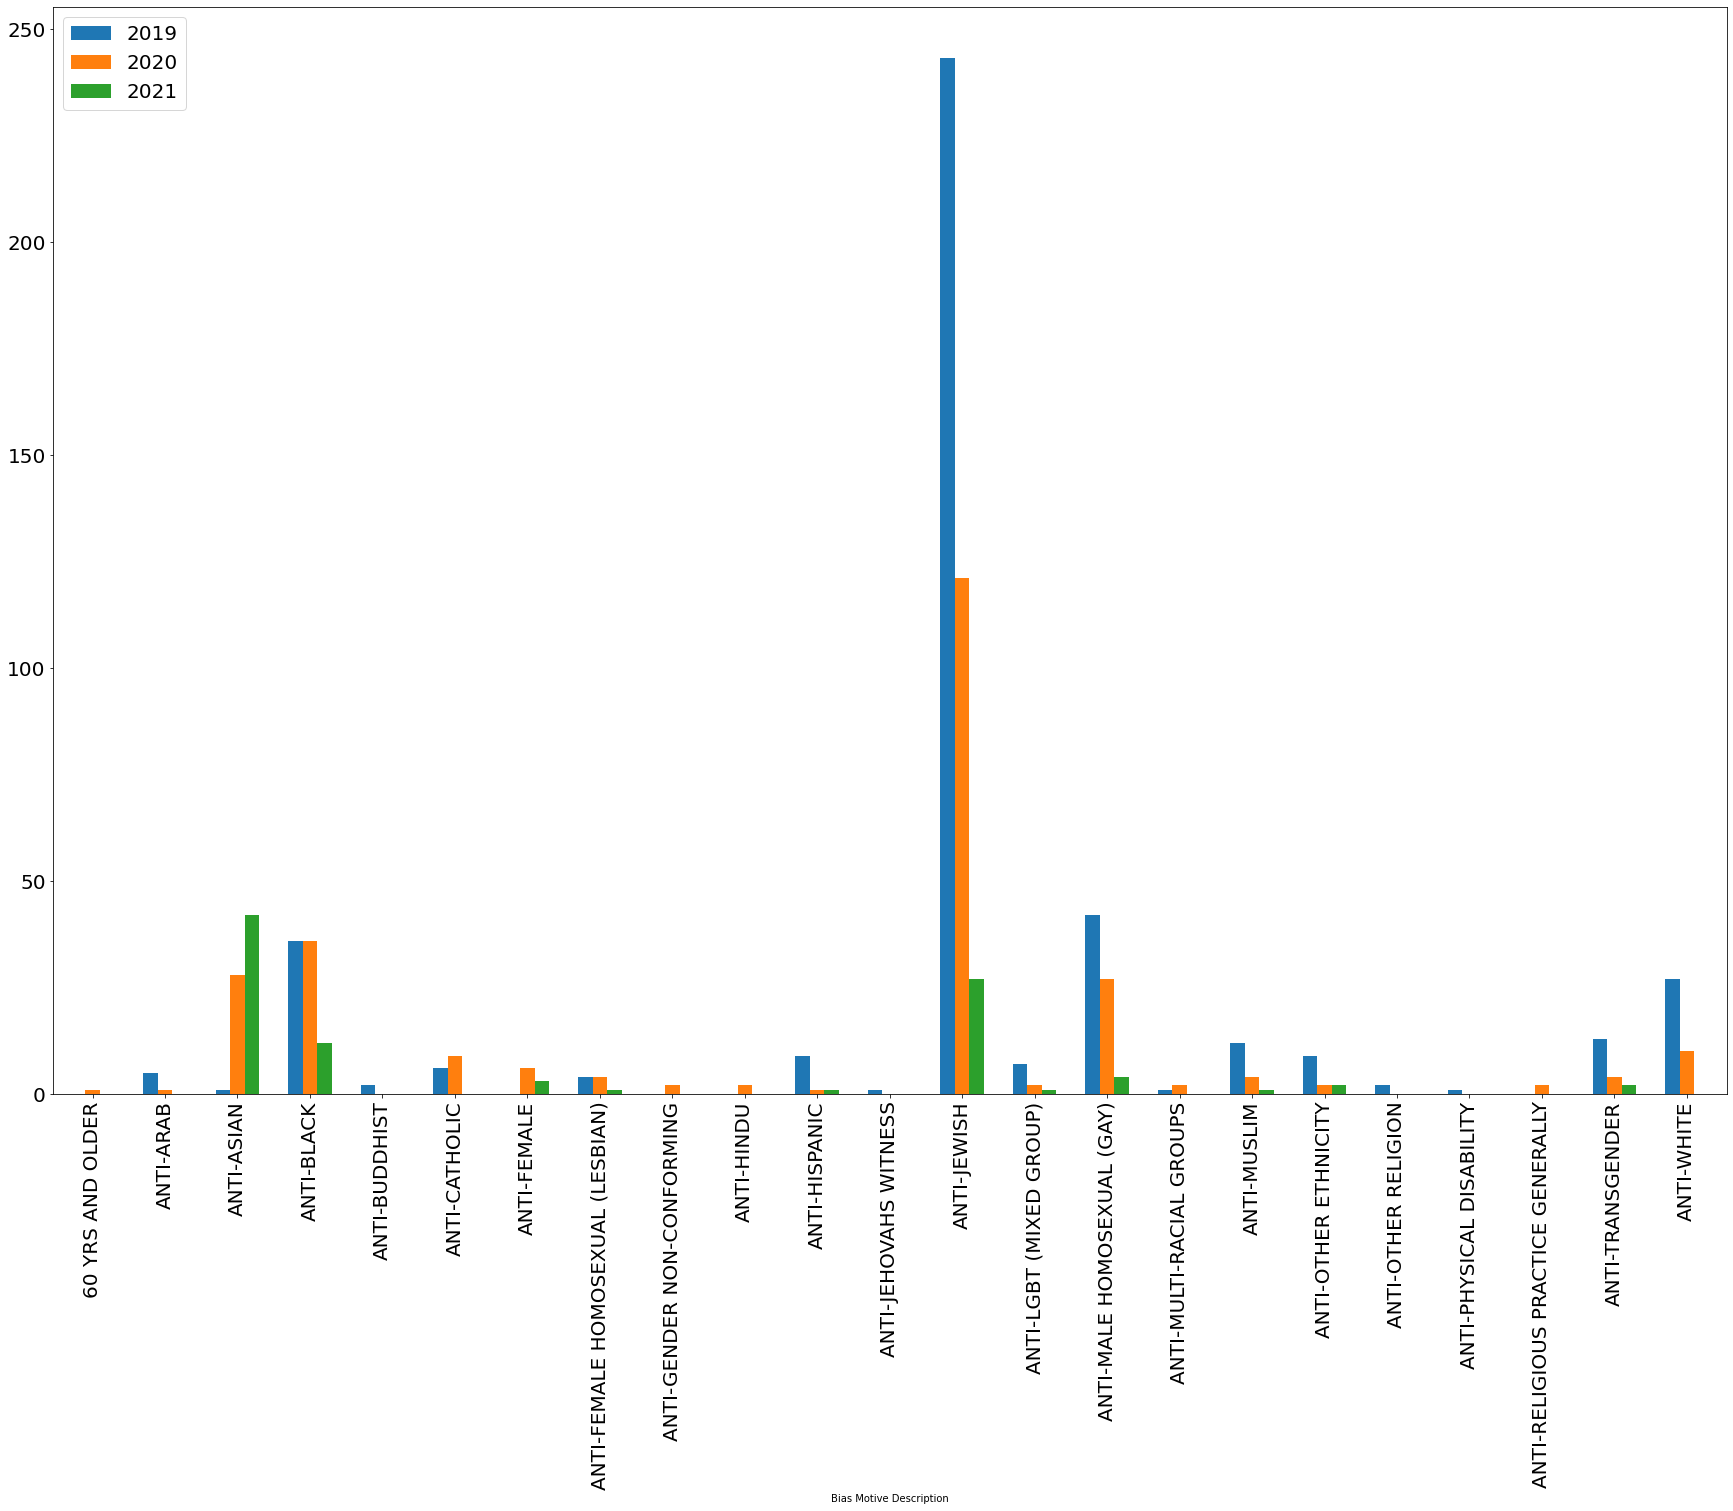

In [7]:
plot = pd.crosstab(dfnew['Bias Motive Description'],dfnew['Complaint Year Number']).plot(kind='bar', width=0.6, figsize=(30,20), fontsize=20)
plot.legend(loc=2,fontsize=20)

In [8]:
dfdf = dfnew.groupby(['Complaint Year Number', 'Bias Motive Description', 'Month Number']).size().to_frame('size')
dfdf.query('`Bias Motive Description` == "ANTI-ASIAN"')

size
Complaint Year Number Bias Motive Description Month Number      
2019                  ANTI-ASIAN              1                1
2020                  ANTI-ASIAN              1                1
                                              3               12
                                              4                4
                                              5                3
                                              6                1
                                              7                3
                                              9                1
                                              10               1
                                              12               2
2021                  ANTI-ASIAN              1                1
                                              2                8
                                              3               33

In [9]:
dfdf.query('`Bias Motive Description` == "ANTI-JEWISH"')

size
Complaint Year Number Bias Motive Description Month Number      
2019                  ANTI-JEWISH             1               26
                                              2               17
                                              3               27
                                              4               13
                                              5               22
                                              6               18
                                              7                7
                                              8               25
                                              9               15
                                              10              28
                                              11              16
                                              12              29
2020                  ANTI-JEWISH             1               19
                                              2               18
                                              3               12
                                              4                6
                                              5                5
                                              6                3
                                              7               11
                                              8                5
                                              9               10
                                              10              12
                                              11              11
                                              12               9
2021                  ANTI-JEWISH             1                4
                                              2                9
                                              3               14

In [10]:
dfdf.query('`Bias Motive Description` == "ANTI-BLACK"')

size
Complaint Year Number Bias Motive Description Month Number      
2019                  ANTI-BLACK              1                2
                                              2                2
                                              3                7
                                              4                4
                                              5                1
                                              6                4
                                              7                5
                                              8                2
                                              9                1
                                              10               4
                                              11               1
                                              12               3
2020                  ANTI-BLACK              1                4
                                              2                3
                                              3                2
                                              5                1
                                              6                4
                                              7                4
                                              8                7
                                              9                4
                                              10               3
                                              11               1
                                              12               3
2021                  ANTI-BLACK              1                5
                                              2                3
                                              3                4

In [11]:
dfdf.query('`Bias Motive Description` == "ANTI-MALE HOMOSEXUAL (GAY)"')

size
Complaint Year Number Bias Motive Description    Month Number      
2019                  ANTI-MALE HOMOSEXUAL (GAY) 1                2
                                                 2                3
                                                 3                3
                                                 4                5
                                                 5                2
                                                 6                4
                                                 7                5
                                                 8                1
                                                 9                5
                                                 10               5
                                                 11               5
                                                 12               2
2020                  ANTI-MALE HOMOSEXUAL (GAY) 1                2
                                                 2                3
                                                 3                1
                                                 5                2
                                                 6                2
                                                 7                2
                                                 8                4
                                                 9                2
                                                 10               6
                                                 11               1
                                                 12               2
2021                  ANTI-MALE HOMOSEXUAL (GAY) 1                1
                                                 2                2
                                                 3                1

<AxesSubplot:xlabel='Complaint Year Number,Month Number'>

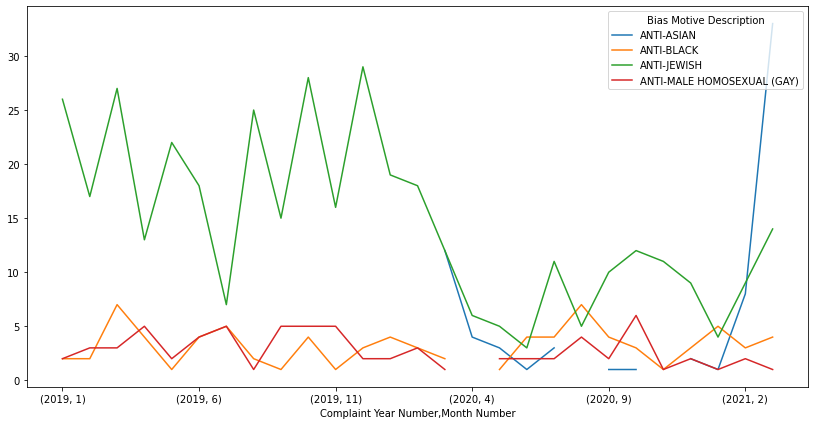

In [12]:
combi = dfnew.query('`Bias Motive Description` == "ANTI-JEWISH" | `Bias Motive Description` == "ANTI-ASIAN" | `Bias Motive Description` == "ANTI-BLACK" | `Bias Motive Description` == "ANTI-MALE HOMOSEXUAL (GAY)"')
combi.groupby(['Bias Motive Description', 'Complaint Year Number', 'Month Number']).size().unstack(level=0).plot(figsize=(14, 7))

<AxesSubplot:xlabel='Complaint Year Number,Month Number'>

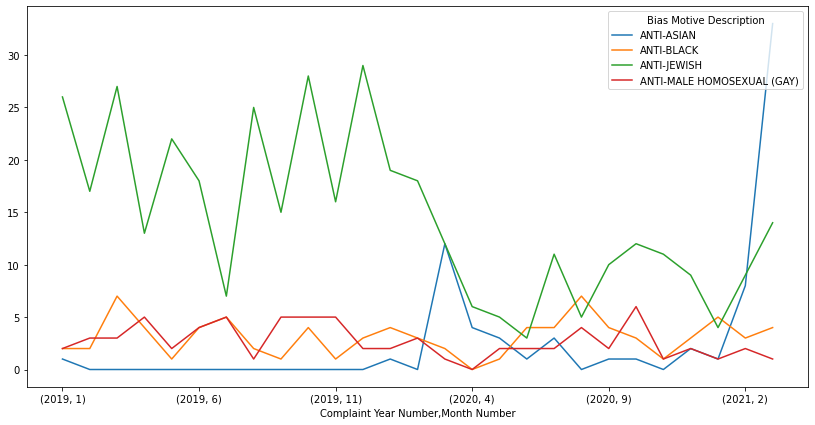

In [13]:
df2 = pd.read_csv('../datasets/crimes/hate_crime_4.csv',header=0)
df2.pivot(index=['Complaint Year Number', 'Month Number'], columns='Bias Motive Description', values='Count').plot(figsize=(14, 7))

<AxesSubplot:xlabel='year,month'>

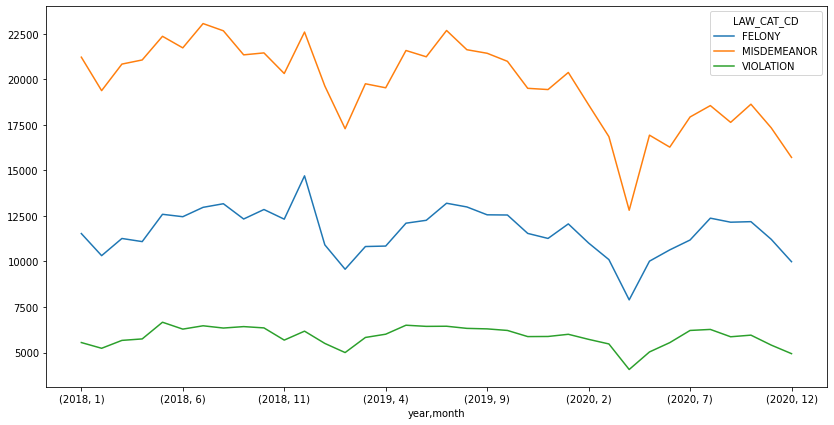

In [15]:
df3 = pd.read_csv('../datasets/crimes/crime_result.csv',header=0)
df3.pivot(index=['year', 'month'], columns='LAW_CAT_CD', values='cnt').plot(figsize=(14, 7))

In [19]:
df3.groupby(['year']).sum('cnt')

,month,cnt
year,,
2018,234,478119
2019,234,457543
2020,234,404892
